In [51]:
# Using scarches kernel
import sys
sys.path.append("../../function/")
import trajDiff_v106
milo2=trajDiff_v106.Milo2()
import scanpy as sc
import numpy as np
import pandas as pd
import PyComplexHeatmap
import matplotlib.pyplot as plt

In [3]:
null=sc.read("../processed_data/11.27_gene_null/12.1_trend_finely.h5ad")

In [4]:
null.X=null.layers["count"]

In [5]:
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]

In [6]:
del null.obsm["X_diffmap"]

In [7]:
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)


2023-12-06 19:40:08.271167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 19:40:09.620022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
milo2.make_nhoods(nulldata['rna'], prop=0.03)

In [9]:
nulldata = milo2.count_nhoods(null, sample_col="random_sample")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [10]:
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)

100%|██████████| 603/603 [00:18<00:00, 32.74it/s]


In [37]:
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)

Using edgeR to find DEG......

  6%|▌         | 36/603 [00:00<00:02, 235.18it/s]Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr

In [44]:
nulldata["pseudobulk"].varm["GroupGroup1"]

,Ablation_Matsushita_abl14_ACTGAACGTGGCGAAT-1_1-0-2,Ablation_Matsushita_abl14_CCCATACAGGCTAGCA-1_1-0-2,Ablation_Matsushita_abl14_CCGTGGATCCATTCTA-1_1-0-2,Ablation_Matsushita_abl7con1_ACGATGTGTACACCGC-1_2-0-2,Ablation_Matsushita_abl7con1_AGAGCGAGTGCACGAA-1_2-0-2,Ablation_Matsushita_abl7con1_AGGTCCGTCTCCCTGA-1_2-0-2,Ablation_Matsushita_abl7con1_CAGCTAAGTACGCTGC-1_2-0-2,Ablation_Matsushita_abl7con1_CGGACACCATAGAAAC-1_2-0-2,Ablation_Matsushita_abl7con1_CGTCACTAGCTGTTCA-1_2-0-2,Ablation_Matsushita_abl7con1_GACACGCGTACCGAGA-1_2-0-2,...,TGATCAGAGGCTGAAC-1_4-1-2,TGATGCAAGAACAGGA-1_4-1-2,TGGATCATCTACTCAT-1_4-1-2,TTCTCTCTCTGGGCCA-1_4-1-2,TTGACCCTCAGTCCGG-1_4-1-2,TTGGGCGGTTCGTACA-1_4-1-2,CACCGTTTCAGCTTCC-1_5-1-2,GATTCTTTCTACTATC-1_5-1-2,TCACACCGTCTTGAAC-1_5-1-2,TCGTGCTCAAGAAATC-1_5-1-2
0,4.763139e+08,2.614108e+08,3.863525e+08,1.880241e+08,1.213333e+08,3.680333e+08,1.014576e+08,3.572276e+08,2.080970e+08,2.237641e+08,...,1.774062e+06,1.437620e+06,7.579432e+05,2.600301e+06,4.228099e+06,1.968820e+06,2.072140e+06,1.501196e+06,1.729741e+06,3.429866e+06
1,4.763234e+08,2.614205e+08,3.863604e+08,1.880337e+08,1.213389e+08,3.680457e+08,1.014631e+08,3.572422e+08,2.081063e+08,2.237778e+08,...,1.891303e+06,1.610624e+06,9.599659e+05,2.903899e+06,4.482612e+06,2.164388e+06,2.349108e+06,1.729083e+06,1.937343e+06,3.648342e+06
2,4.763329e+08,2.614302e+08,3.863684e+08,1.880434e+08,1.213445e+08,3.680581e+08,1.014685e+08,3.572568e+08,2.081156e+08,2.237915e+08,...,2.008544e+06,1.783628e+06,1.161988e+06,3.207498e+06,4.737126e+06,2.359955e+06,2.626077e+06,1.956970e+06,2.144946e+06,3.866818e+06
3,4.763424e+08,2.614398e+08,3.863764e+08,1.880531e+08,1.213501e+08,3.680705e+08,1.014740e+08,3.572714e+08,2.081249e+08,2.238052e+08,...,2.125785e+06,1.956632e+06,1.364011e+06,3.511096e+06,4.991640e+06,2.555523e+06,2.903045e+06,2.184857e+06,2.352549e+06,4.085295e+06
4,4.763519e+08,2.614495e+08,3.863844e+08,1.880627e+08,1.213557e+08,3.680829e+08,1.014794e+08,3.572859e+08,2.081341e+08,2.238189e+08,...,2.243026e+06,2.129636e+06,1.566034e+06,3.814695e+06,5.246154e+06,2.751090e+06,3.180014e+06,2.412745e+06,2.560151e+06,4.303771e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.772154e+08,2.623309e+08,3.871102e+08,1.889426e+08,1.218649e+08,3.692127e+08,1.019754e+08,3.586121e+08,2.089793e+08,2.250653e+08,...,1.291196e+07,1.787300e+07,1.995009e+07,3.144216e+07,2.840691e+07,2.054773e+07,2.838415e+07,2.315047e+07,2.145199e+07,2.418512e+07
96,4.772249e+08,2.623406e+08,3.871181e+08,1.889522e+08,1.218705e+08,3.692251e+08,1.019808e+08,3.586267e+08,2.089886e+08,2.250790e+08,...,1.302920e+07,1.804601e+07,2.015211e+07,3.174576e+07,2.866143e+07,2.074330e+07,2.866112e+07,2.337836e+07,2.165960e+07,2.440360e+07
97,4.772344e+08,2.623503e+08,3.871261e+08,1.889619e+08,1.218761e+08,3.692375e+08,1.019863e+08,3.586412e+08,2.089979e+08,2.250927e+08,...,1.314644e+07,1.821901e+07,2.035414e+07,3.204935e+07,2.891594e+07,2.093886e+07,2.893809e+07,2.360624e+07,2.186720e+07,2.462208e+07
98,4.772438e+08,2.623600e+08,3.871341e+08,1.889716e+08,1.218817e+08,3.692499e+08,1.019917e+08,3.586558e+08,2.090071e+08,2.251064e+08,...,1.326368e+07,1.839201e+07,2.055616e+07,3.235295e+07,2.917045e+07,2.113443e+07,2.921505e+07,2.383413e+07,2.207480e+07,2.484055e+07


In [52]:
single_cpm=milo2.make_single_cpm(nulldata,njob=-1,fix_libsize=True)

Using edgeR to find CPM......

100%|██████████| 603/603 [01:21<00:00,  7.38it/s]


MergeError: Passing 'suffixes' which cause duplicate columns {'CPM_single_x'} is not allowed.

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to cons

In [50]:
nulldata["milo"]

AnnData object with n_obs × n_vars = 10 × 603
    var: 'index_cell', 'kth_distance'
    uns: 'sample_col'
    varm: 'GroupGroup1', 'GroupGroup2'

In [ ]:
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)

In [13]:
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=4)

working on 0 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:14<00:00,  8.08it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4526.94it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:13<00:00,  8.22it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 5410.54it/s]


working on 2 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:13<00:00,  8.18it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 3996.94it/s]


working on 3 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:12<00:00,  8.35it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 3907.71it/s]


In [14]:
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")

In [15]:
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)

In [16]:
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

In [103]:
del pseudobulk.varm['nullPoint']
del pseudobulk.varm['truePoint']
del pseudobulk.varm['exprPoint']
del pseudobulk.varm['gene_p_adj']

In [192]:
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

In [193]:
exprMatrix=pseudobulk.varm["exprPoint"]

In [194]:
df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))

/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x

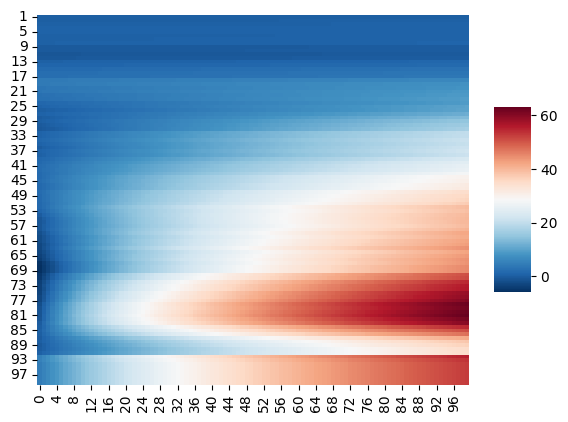

In [195]:
PyComplexHeatmap.heatmap(exprMatrix.T,cmap="RdBu_r")
plt.savefig("../result/12.3_benchmark_gene/8_mean_trend_expr.pdf")

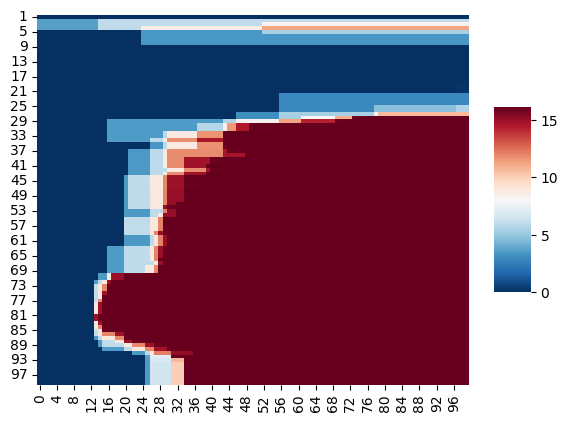

In [198]:
adj=pseudobulk.varm["gene_p_adj"]
adj=-np.log(adj+0.0000001).T
PyComplexHeatmap.heatmap(adj,cmap="RdBu_r")
plt.savefig("../result/12.3_benchmark_gene/8_mean_trend_p.pdf")

In [202]:
pseudobulk.varm["edgeR_overall"].to_csv("../result/12.3_benchmark_gene/8_mean_trend_edgeR.csv")
pseudobulk.var.to_csv("../result/12.3_benchmark_gene/8_mean_trend_binom.csv")

In [206]:
pseudobulk.varm["PValue"]

,Ablation_Matsushita_abl14_ACTGAACGTGGCGAAT-1_1-0-2,Ablation_Matsushita_abl14_CCCATACAGGCTAGCA-1_1-0-2,Ablation_Matsushita_abl14_CCGTGGATCCATTCTA-1_1-0-2,Ablation_Matsushita_abl7con1_ACGATGTGTACACCGC-1_2-0-2,Ablation_Matsushita_abl7con1_AGAGCGAGTGCACGAA-1_2-0-2,Ablation_Matsushita_abl7con1_AGGTCCGTCTCCCTGA-1_2-0-2,Ablation_Matsushita_abl7con1_CAGCTAAGTACGCTGC-1_2-0-2,Ablation_Matsushita_abl7con1_CGGACACCATAGAAAC-1_2-0-2,Ablation_Matsushita_abl7con1_CGTCACTAGCTGTTCA-1_2-0-2,Ablation_Matsushita_abl7con1_GACACGCGTACCGAGA-1_2-0-2,...,TGATCAGAGGCTGAAC-1_4-1-2,TGATGCAAGAACAGGA-1_4-1-2,TGGATCATCTACTCAT-1_4-1-2,TTCTCTCTCTGGGCCA-1_4-1-2,TTGACCCTCAGTCCGG-1_4-1-2,TTGGGCGGTTCGTACA-1_4-1-2,CACCGTTTCAGCTTCC-1_5-1-2,GATTCTTTCTACTATC-1_5-1-2,TCACACCGTCTTGAAC-1_5-1-2,TCGTGCTCAAGAAATC-1_5-1-2
0,0.021147,0.815409,0.822897,0.954143,0.457769,0.163258,0.448090,0.967519,0.323790,0.520636,...,9.671306e-01,2.434291e-01,9.741072e-01,9.499558e-01,9.732416e-01,7.271520e-01,9.155251e-01,7.489108e-01,8.996057e-01,8.329606e-01
1,0.021139,0.815526,0.823011,0.954000,0.457652,0.163195,0.448208,0.967692,0.323867,0.520394,...,9.237269e-01,3.438882e-01,7.545468e-01,7.247144e-01,8.209057e-01,5.729029e-01,8.504087e-01,9.709137e-01,9.073804e-01,6.932207e-01
2,0.021131,0.815644,0.823125,0.953857,0.457534,0.163132,0.448325,0.967865,0.323943,0.520153,...,8.192707e-01,4.608581e-01,5.338037e-01,5.309430e-01,6.790411e-01,4.419748e-01,6.410732e-01,8.188288e-01,7.292751e-01,5.669395e-01
3,0.021124,0.815762,0.823239,0.953714,0.457417,0.163070,0.448443,0.968037,0.324019,0.519912,...,7.208241e-01,5.906787e-01,3.655955e-01,3.745810e-01,5.510944e-01,3.343986e-01,4.658797e-01,6.317074e-01,5.722313e-01,4.559296e-01
4,0.021116,0.815880,0.823352,0.953571,0.457299,0.163007,0.448560,0.968210,0.324096,0.519671,...,6.293384e-01,7.288489e-01,2.436541e-01,2.552001e-01,4.390594e-01,2.484999e-01,3.273191e-01,4.736572e-01,4.390915e-01,3.607851e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.020416,0.826602,0.833712,0.940590,0.446699,0.157376,0.459300,0.983914,0.331072,0.498036,...,8.219021e-09,1.690230e-08,5.785364e-17,1.842928e-33,7.074789e-19,1.132655e-15,7.076820e-31,1.564502e-25,5.356631e-19,4.788206e-19
96,0.020408,0.826720,0.833826,0.940448,0.446583,0.157315,0.459419,0.984086,0.331149,0.497801,...,7.230450e-09,1.490041e-08,5.002507e-17,7.189884e-34,5.670315e-19,9.469445e-16,2.980718e-31,7.668381e-26,3.804238e-19,4.268283e-19
97,0.020401,0.826838,0.833940,0.940305,0.446468,0.157254,0.459538,0.984258,0.331227,0.497567,...,6.368826e-09,1.315293e-08,4.334707e-17,2.802205e-34,4.558870e-19,7.934249e-16,1.254372e-31,3.755998e-26,2.707184e-19,3.813214e-19
98,0.020393,0.826956,0.834054,0.940163,0.446353,0.157194,0.459656,0.984431,0.331304,0.497333,...,5.616879e-09,1.162547e-08,3.763818e-17,1.091064e-34,3.676561e-19,6.662332e-16,5.274235e-32,1.838425e-26,1.930334e-19,3.414542e-19


In [221]:
pseudobulk.write_h5ad("../../unimportant_processed_data/test.h5ad")

In [210]:
varms=pseudobulk.varm

In [222]:
pseudobulk.varm["null_mean"]=varms["null_mean"]

In [293]:
for i in varms.keys():
    varms[i]=varms[i].fillna(0)
for i in milo.varm.keys():
    milo.varm[i]=milo.varm[i].fillna(0)

In [254]:
del pseudobulk.varm[]

In [264]:
varms["null_mean"].columns=varms["logFC"].columns

In [271]:
varms["null_mean"]=varms["null_mean"].fillna(0)
varms["null_mean"]=varms["null_mean"].fillna(0)

In [294]:
pseudobulk.varm=varms

In [295]:
pseudobulk.write_h5ad("../../unimportant_processed_data/test.h5ad")

In [300]:
nulldata.write_h5mu("../processed_data/11.27_gene_null/null_mean_trend.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [303]:
null=sc.read("../processed_data/11.27_gene_null/null_model_mean_finely_v9.h5ad")
null.X=null.layers["count"]
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]
del null.obsm["X_diffmap"]
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)
milo2.make_nhoods(nulldata['rna'], prop=0.03)
nulldata = milo2.count_nhoods(null, sample_col="random_sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=4)
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
100%|██████████| 603/603 [00:17<00:00, 34.21it/s]


Using edgeR to find DEG......

  0%|          | 0/603 [00:00<?, ?it/s]Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4385.83it/s]


working on 0 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:11<00:00,  8.43it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4614.55it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:11<00:00,  8.49it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4232.35it/s]


working on 2 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:13<00:00,  8.20it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4369.11it/s]


working on 3 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:13<00:00,  8.25it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 3974.93it/s]


In [312]:
nulldata["pseudobulk"].var[40:80]

,overall_gene_p
40,2.646873e-02
41,2.646873e-02
42,2.646873e-02
43,2.646873e-02
44,7.731910e-15
45,0.000000e+00
46,0.000000e+00
47,0.000000e+00
48,0.000000e+00
49,0.000000e+00


In [461]:
nulldata["pseudobulk"].varm["edgeR_overall"][0:40]

,logFC,logCPM,F,PValue,FDR
0,-0.001716,25.168501,0.004632,0.945741,0.945741
1,0.002251,25.168739,0.004877,0.944322,0.945741
2,0.006181,25.168978,0.042655,0.836377,0.853446
3,0.010073,25.169217,0.116990,0.732322,0.754971
4,0.013929,25.169455,0.226941,0.633802,0.660210
5,0.017749,25.169694,0.371592,0.542138,0.570672
6,0.021534,25.169932,0.550054,0.458296,0.487549
7,0.025284,25.170171,0.761468,0.382870,0.411688
8,0.029000,25.170409,1.004997,0.316105,0.343592
9,0.032683,25.170648,1.279830,0.257931,0.283441


In [464]:
nulldata["pseudobulk"].varm

AxisArrays with keys: PValue, logFC, logCPM, FDR, F, SPFDR, null_mean, edgeR_overall, nullPoint, truePoint, exprPoint, gene_p_adj, GroupGroup1, GroupGroup2, group1_cpm, group2_cpm

In [465]:
exprMatrix=nulldata["pseudobulk"].varm["exprPoint"]

<Axes: >

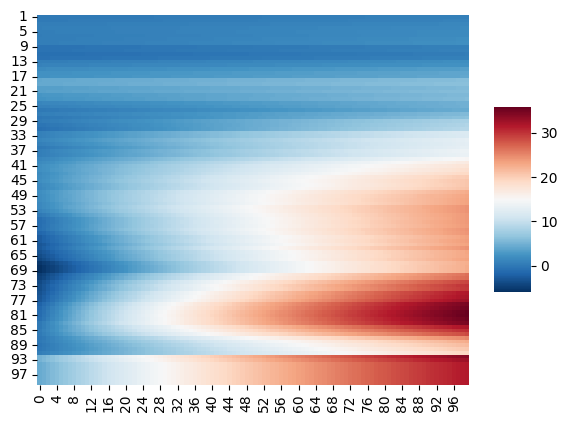

In [466]:
PyComplexHeatmap.heatmap(exprMatrix.T,cmap="RdBu_r")

<Axes: >

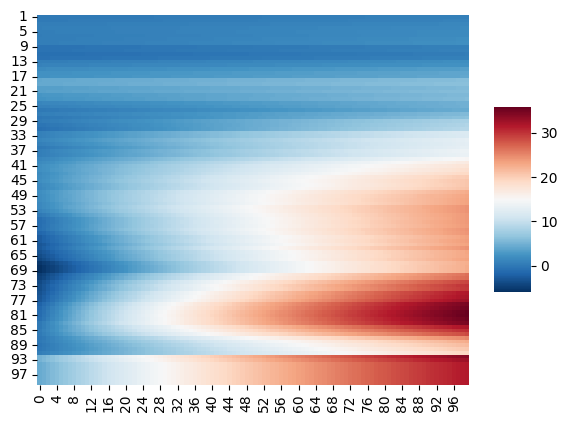

In [315]:
exprMatrix=nulldata["pseudobulk"].varm["exprPoint"]
PyComplexHeatmap.heatmap(exprMatrix.T,cmap="RdBu_r")


<Axes: >

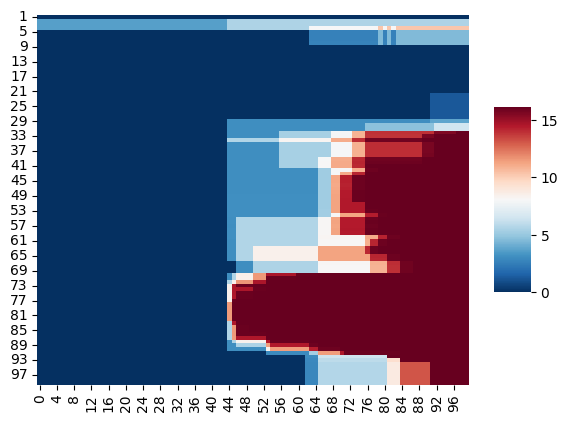

In [316]:
adj=pseudobulk.varm["gene_p_adj"]
adj=-np.log(adj+0.0000001).T
PyComplexHeatmap.heatmap(adj,cmap="RdBu_r")

In [320]:
for i in pseudobulk.varm.keys():
    pseudobulk.varm[i]=pseudobulk.varm[i].fillna(0)
milo=nulldata["milo"]
for i in milo.varm.keys():
    milo.varm[i]=milo.varm[i].fillna(0)

In [321]:
nulldata.write_h5mu("../processed_data/11.27_gene_null/null_mean_v9.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [194]:
df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))

/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x: np.log1p(x))
/tmp/ipykernel_31094/2226089746.py:1: RuntimeWarning: invalid value encountered in log1p
  df_log1p = exprMatrix.applymap(lambda x

In [ ]:
null=sc.read("../processed_data/11.27_gene_null/null_shuffle_model_peak_finely_v12.h5ad")
null.X=null.layers["count"]
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]
del null.obsm["X_diffmap"]
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)
milo2.make_nhoods(nulldata['rna'], prop=0.03)
nulldata = milo2.count_nhoods(null, sample_col="random_sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=4)
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

In [231]:
null

AnnData object with n_obs × n_vars = 22670 × 100
    obs: 'Group', 'random_sample', 'time', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    uns: 'neighbors', 'nhood_neighbors_key'
    obsm: 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_draw_graph_fa', 'X_pca', 'X_scANVI', 'X_umap', 'nhoods', 'palantir_fate_probabilities'
    layers: 'count', 'data'
    obsp: 'distances', 'connectivities'